<a href="https://colab.research.google.com/github/vincimech010233/MachineLearningBasics/blob/master/ResistenciaTension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8/8 [==============================] - 0s 2ms/step - loss: 0.1000
Loss en el conjunto de prueba: 0.10004305839538574
8/8 [==============================] - 0s 2ms/step


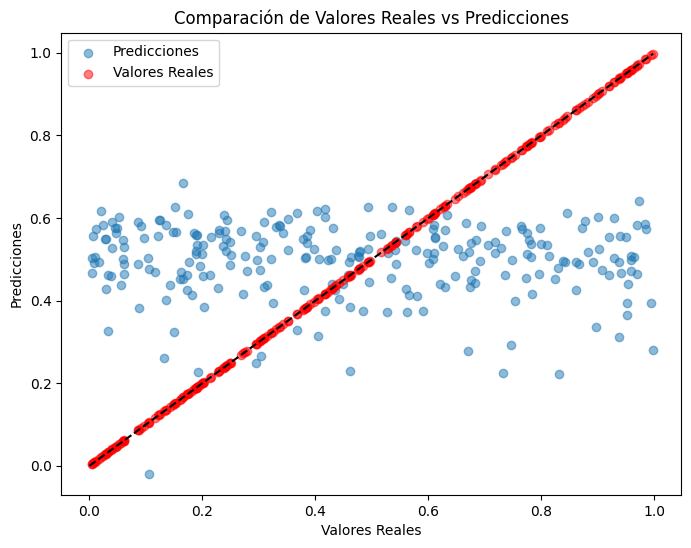

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar datos ficticios (reemplazar con datos reales)
np.random.seed(0)
n_samples = 1000
datos_ficticios = np.random.rand(n_samples, 3) # 3 características: densidad, punto de fusión, etc.
propiedades = np.random.rand(n_samples) # Propiedad a predecir

# Crear un DataFrame (opcional, pero útil para manejo de datos)
df = pd.DataFrame(datos_ficticios, columns=['Densidad', 'PuntoFusion', 'OtraPropiedad'])
df['ResistenciaTension'] = propiedades

# Dividir los datos en entrenamiento y prueba
X = df[['Densidad', 'PuntoFusion', 'OtraPropiedad']]
y = df['ResistenciaTension']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Crear el modelo
model = Sequential([
    Dense(10, activation='relu', input_shape=(3,)),
    Dense(10, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_split=0.25, verbose=0)

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Loss en el conjunto de prueba: {loss}")

# Predecir los valores
y_pred = model.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicciones')  # Predicciones en color por defecto
plt.scatter(y_test, y_test, alpha=0.5, color='red', label='Valores Reales')  # Valores reales en rojo

# Línea de predicción perfecta
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'k--')  # Línea de x=y

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()
